### Importação das bibliotecas e arquivos .csv

In [2]:
import pandas as pd
import seaborn as sns

notas = pd.read_csv("https://raw.githubusercontent.com/jairoalmeid/AnalysisMovieLens/main/Dataset/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ["usuarioId", "filmeId", "nota", "timestamp"]
notas.head()

,usuarioId,filmeId,nota,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Exibe os valores possíveis dentro de nota, informação importante para determinar as avaliações possíveis/recebidas

In [5]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

Impressão de média e mediana da amostra

In [6]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


Distribuição das avaliações dos filmes em histograma

<AxesSubplot:ylabel='Frequency'>

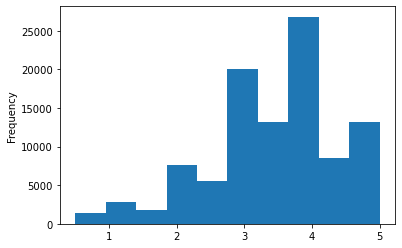

In [7]:
notas.nota.plot(kind='hist')

In [8]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

C:\Users\Jairo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

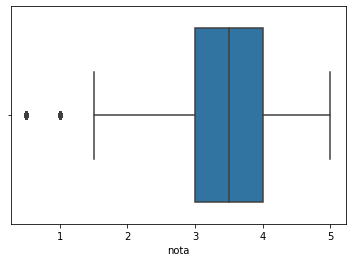

In [9]:
sns.boxplot(notas.nota)

### Análise de filmes

In [10]:
filmes = pd.read_csv("https://github.com/jairoalmeid/AnalysisMovieLens/raw/main/Dataset/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
# Média das avaliações do filmeId 1
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [12]:
# Média das avaliações do filmeId 2
notas.query("filmeId==2").nota.mean()

3.4318181818181817

Criando um dataframe com agrupamento de filmeId e média das avaliações

In [13]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

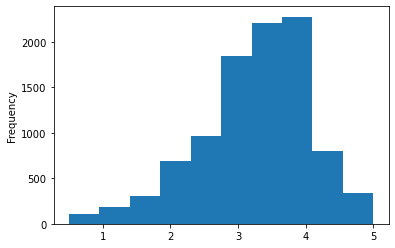

In [14]:
medias_por_filme.plot(kind="hist")

<AxesSubplot:ylabel='nota'>

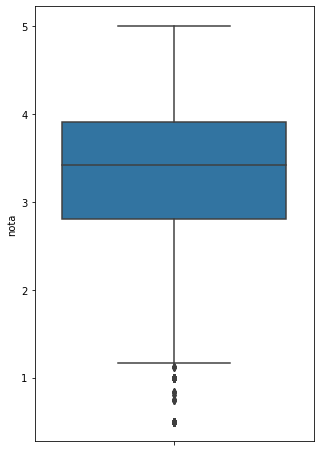

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [16]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

C:\Users\Jairo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

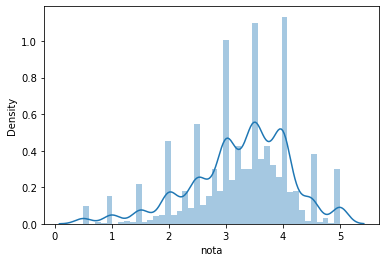

In [17]:
sns.distplot(medias_por_filme)

AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

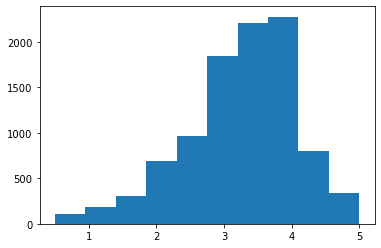

In [18]:
plt.hist(medias_por_filme)
plt.tittle("Histograma das médias dos filmes")